## Extract S&P 500 stocks' names on wikipedia

In [1]:
import pywikibot
import numpy as np
import re
import time
import datetime
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [265]:
site = pywikibot.Site('en', 'wikipedia')
page = pywikibot.page.BasePage(site, 'List of S&P 500 companies')
text = page.text


pattern = re.compile(r'(?:NyseSymbol|NasdaqSymbol)\|[A-Z]{1,6}')
result = pattern.findall(text)
names = [re.sub('(?:NyseSymbol|NasdaqSymbol)\|', '',c) for c in result]

## Calculate monthly return & risk(standard deviation) and save to sp_500.csv

In [268]:
start = datetime.datetime(2016,10,1)
end = datetime.datetime(2017,10,1)
sp_500 = pd.DataFrame(columns = ['Return', 'Risk', 'Industry'], index = names)  


In [269]:
def calculate_stock(name, start, end, period):
    try:
        prices = web.DataReader(name, 'yahoo', start, end)
    except:
        return None
    
    Endings = prices.Close
    for i in range(len(Endings)):
        if Endings[i] is np.nan: Endings[i] = Endings[i-1]
    
    
    increases = []
    for i in range(len(Endings) - period):
        increase = (Endings[i+period] - Endings[i])/Endings[i]
        increases.append(increase)
    increases_ = np.array(increases)
    return (np.mean(increases_), np.std(increases_))

In [1]:
names = pd.read_csv('names.csv') # a list of S&P500 names
for name in names:
    new_stock = calculate_stock(name, start, end, 20)
    sp_500.loc[name] = [new_stock[0], new_stock[1]]

# drop 'BF',BRK. BF could not be read; BRK has abnormal data.
Sp_500 = sp_500.drop(['BF', 'BRK'])

## Choose 50 best stocks from S&P500.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

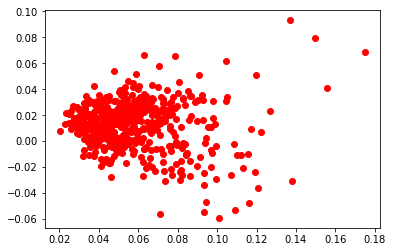

In [4]:
plt.plot(Sp_500.Risk.values, Sp_500.Return.values, 'ro')

plt.show()

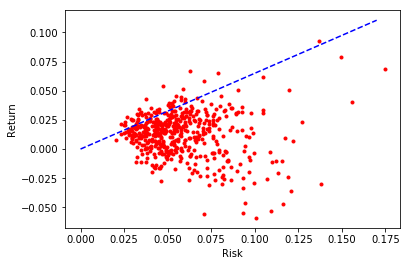

In [5]:
plt.plot(Sp_500.Risk.values, Sp_500.Return.values, 'r.')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.plot(np.arange(0,0.18,0.01), np.arange(0,0.18,0.01)*0.65, 'b--')
plt.show()

In [365]:
np.sum(Sp_500.Return > Sp_500.Risk*0.65)

49

In [366]:
Sp_max49 = Sp_500[Sp_500.Return > Sp_500.Risk*0.65]

In [367]:
Sp_max49.to_csv('SP500_preparation.csv')

,Unnamed: 0,Return,Risk
6,ADBE,0.030493,0.037011
13,A,0.032049,0.034831
17,ALB,0.039994,0.059843
20,ALGN,0.066530,0.062775
25,ALL,0.024929,0.033204
33,AXP,0.028870,0.040548
39,AME,0.031155,0.038887
41,APH,0.020998,0.024724
46,ANTM,0.039226,0.052451
47,AON,0.023201,0.025769
